# House prices prediction with linear regression model

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import os
import csv

In [120]:
trn_file = './dataset/training_set.csv' # Set contains 1st 1000 rows for training
data_mtx = read_csv_file(trn_file)
print("Training set dims:")
print(data_mtx.shape)

# Uncomment below function call to remove a feature from data (OverallQuall in this case)
# data_mtx = rmv_col(data_mtx, "OverallQual")
# print("Dim without OverallQual: ", str(data_mtx.shape))

#Uncomment below function call to generate plots of features vs SalePrice
# gen_plots(data_mtx)

year_blt_sq = gen_fld_sq(data_mtx, "YearBuilt")

year_blt_sq = np.c_[year_blt_sq]

data_mtx = np.append(data_mtx, year_blt_sq, axis=1) # add year built square to data
print(data_mtx.shape)

W_size = data_mtx.shape[1]-1 # -1 is to discard output in col 0
# print(bin_size)

W = np.zeros((int(W_size)+1, 1))
W_sum = np.zeros((int(W_size)+1, 1))
W = W.astype(float)
W_sum = W_sum.astype(float)
print(W.shape)
bin_epoch = 1

# rmv_bin(data_mtx, cursor, 239)
folds = 5
bin_size = int((data_mtx.shape[0]-1)/5)

print("bin size: %d" % bin_size)

cursor = 1

for i in range(5):
    
    ho_bin = get_bin(data_mtx, cursor, bin_size)
    trn_data, cursor = rmv_bin(data_mtx, cursor, bin_size) 
    input = trn_data[1:trn_data.shape[0], 1:trn_data.shape[1]]
    output = trn_data[1:trn_data.shape[0], 0]
    test_output = ho_bin[:, 0]

    print("Training (Please don't disturb) ...")
    W_i = lin_reg(input, output)
    W_sum += W_i
    W = W_sum/bin_epoch

    MSE_trn = compute_bin_MSE(input, output, W)

    print("Fold %d MSE_train = %f " % (bin_epoch, MSE_trn))

    bin_epoch += 1

print("Training complete! Final MSE train: %f" % MSE_trn)




Training set dims:
(1001, 11)
(1001, 12)
(12, 1)
bin size: 200
Cursor at: 201
Training (Please don't disturb) ...
Fold 1 MSE_train = 0.003273 
Cursor at: 401
Training (Please don't disturb) ...
Fold 2 MSE_train = 0.002751 
Cursor at: 601
Training (Please don't disturb) ...
Fold 3 MSE_train = 0.003122 
Cursor at: 801
Training (Please don't disturb) ...
Fold 4 MSE_train = 0.002939 
Cursor at: 1001
Training (Please don't disturb) ...
/home/pascal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.
Fold 5 MSE_train = 0.003064 
Training complete! Final MSE train: 0.003064


In [121]:
test_file = './dataset/testing_set.csv' # Set contains 1st 1000 rows for training
test_data_mtx = read_csv_file(test_file)

test_year_blt_sq = gen_fld_sq(test_data_mtx, "YearBuilt")
test_year_blt_sq = np.c_[test_year_blt_sq] #Covert to column vect
test_data_mtx = np.append(test_data_mtx, test_year_blt_sq, axis=1) #add year built square to data

lin_reg_predict(test_data_mtx, W)

dims data: (196, 12)
MSE test: 0.005760


0.005760378794534687

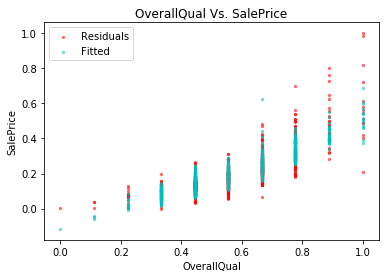

obvs shape (1000, 1) 
res shape (1000, 1) 
Preds shape (1000,) 


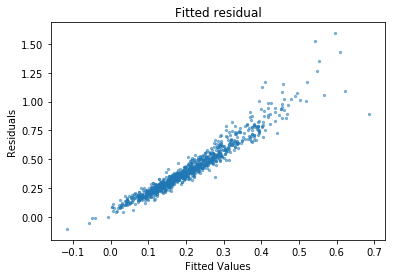

In [135]:
obsv = data_mtx[1:data_mtx.shape[0], 0].astype(float) #observed value
X = data_mtx[1:data_mtx.shape[0], 1:data_mtx.shape[1]].astype(float)
X = augment(X)
preds = np.dot(X, W)
area = 5
overalQual = data_mtx[1:data_mtx.shape[0], 3].astype(float)

fig, ax = plt.subplots()
ax.scatter(overalQual, obsv, s=area, color='r', marker='o', alpha=0.5, label="Residuals")
ax.scatter(overalQual, preds, s=area, color='c', marker='o', alpha=0.5, label = "Fitted")
ax.legend()

plt.title("OverallQual Vs. SalePrice")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.savefig("./figures/results/Overqual_vs_SalePrice.png")
plt.show()
# plt.plot(preds, res, 'o', color='black');
# res = obsv - preds
preds = np.c_[preds]
obsv = np.c_[obsv]
res = np.subtract(obsv, preds)
preds = preds.flatten()
print('Min pred: %f' % )
# print(obsv.shape)
print("obvs shape %s " % str(obsv.shape))
print("res shape %s " % str(res.shape))
# print(res)
print("Preds shape %s " % str(preds.shape))
# print(preds)
plt.title("Fitted residual")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.scatter(preds, res, s=area, marker='o', alpha=0.5)
plt.savefig("./figures/results/fittedResidual.png")

In [98]:
def get_X_and_Y(data):
    X = data[1:data.shape[0], 1:data.shape[1]]
    Y = data[1:data.shape[0], 0]

    Y = Y.astype(float)
    X = X.astype(float)

    X = augment(X)
    Y = np.c_[Y]

    return X, Y

In [116]:
def lin_reg_predict(data, W):
    print("dims data: "+str(data.shape))
    X, true_Y = get_X_and_Y(data)
    MSE_test = compute_MSE(true_Y, np.dot(X, W))
    print("MSE test: %f" % MSE_test)
    return MSE_test




In [96]:
def rmv_bin(data_mtx, start, len):
    cursor = start+len
    rows_to_rmv = range(cursor, cursor+len)
    new_mtx = np.delete(data_mtx, rows_to_rmv, 0)
    print("Cursor at: %d" % cursor)
    return new_mtx, cursor



In [99]:
def compute_bin_MSE(input, output, W):
    X = input.astype(float)
    Y = output.astype(float)
    X = augment(X)
    Y = np.c_[Y]
    return compute_MSE(Y, np.dot(X, W))


In [118]:
def get_bin(data_mtx, start, len):
    cursor = start+len
    bin = data_mtx[start:cursor, :]
    # print('Cursor: %d' % cursor)
    # print('Dims: '+ str(bin.shape))
    return bin

In [101]:
def gen_fld_sq(data_mtx, fld_to_sq):
     fields = data_mtx[0]
     idx = np.where(fields == fld_to_sq)
     year_blt = data_mtx[1:data_mtx.shape[0], idx].astype(float)
     year_blt_sqd = year_blt**2
     year_blt_sqd = year_blt_sqd.astype(str)
     year_blt_sqd = np.insert(year_blt_sqd, 0, fld_to_sq+"Sq")
     return year_blt_sqd

In [102]:
def rmv_col(mtx, fld_to_rmv):
    fields = mtx[0]
    idx = np.where(fields == fld_to_rmv)
    print("Deleting col %d" % idx)
    new_mtx = np.delete(mtx, idx, 1)
    
    return new_mtx


In [103]:
def save_csv_file(file_loc, data, fields):
    with open(file_loc, mode='w') as file:
        file_writer = csv.writer(file, delimiter=',', quotechar='"')
        file_writer.writerow(fields) # write fields outside the loop
        for row in range(data.shape[0]):
            file_writer.writerow(data[row])

In [104]:
def generate_sets(data, max_trn):
    fields = data[0]

    trn_data = data[1:max_trn+1, :]
    test_data = data[max_trn+1:data.shape[0]]
    print("Training set: "+str(trn_data.shape))
    print("Test set: "+str(test_data.shape))

    trn_file_loc = './dataset/training_set.csv'
    test_file_loc = './dataset/testing_set.csv'

    save_csv_file(trn_file_loc, trn_data, fields)
    save_csv_file(test_file_loc, test_data, fields)

In [105]:
def augment(M):
    M = np.insert(M, 0, 1, axis=1) #lose 2-3 precision points through rounding (but oh well!)
    return M

In [106]:
def compute_MSE(Y, Y_hat):
    N = len(Y)
    MSE = (1/N)*((np.linalg.norm(Y-Y_hat))**2)
    # print('MSE train: %f' % MSE)
    return MSE


In [115]:
def grad_desc(Y, X, W, lrn_rate, epochs):
    N = len(Y)
    X_t = np.transpose(X)

    # print("Training (Please don't disturb) ...")
    for epoch in range(epochs):
         D_w = (2/N)*(np.dot(X_t, (np.dot(X,W)-Y)))
         W = W - np.dot(lrn_rate, D_w)
         compute_MSE(Y, np.dot(X, W))
     #     print("####################")
    return W

In [114]:
def lin_reg(X, Y):
    # initial guessing weights
    W = np.zeros((X.shape[1]+1, 1)) #The plus 1 to the rows is to include the intercept Wo
    W = W.astype(float)
    # print(W)
    X = X.astype(float)
    Y = Y.astype(float)
    # Augment input matrix X (1's in col 0)
    X = augment(X)
    # print("New input dims")
    # print(X.shape)
    Y_hat = np.dot(X,W)
    
    Y = np.c_[Y] # convert to column vector
    MSE = compute_MSE(Y,Y_hat)
    W = grad_desc(Y, X, W, 0.01, 100000) # Result of gradient descent is the weights

    return W


In [109]:
def read_csv_file(file):
    data_arr = []
    with open(file, mode='r') as data:
        # data_reader = csv.DictReader(data) # to read as dictionary
        data_reader = csv.reader(data)
        ln_cnt = 0 #line count
        print(data_reader)
        for row in data_reader:
            if ln_cnt == 0:
                field_nb = len(row) #Length of the first row which tells me how many fields there are in the file
                data_arr.append(row)
            else :
                data_arr.append(row)
                
            ln_cnt+= 1

    data_mtx = np.array(data_arr)
    data_mtx.resize((ln_cnt, field_nb))           
            
    return data_mtx




In [93]:
def gen_plots(data):
    fields = data[0] #first row of data contains fields we will use for labels
    data = data[1:data.shape[0], :] # submatrix to ignore row 0
    cols = data.shape[1] 
    print(cols)

    y = data[:, 0]

    for col_id in range(1, cols):
        x = data[:,col_id]
        print(col_id)
        
        area = np.pi*3
        plt.scatter(x, y, s=area, c='b', alpha=0.5)
        plt.title(fields[0]+" Vs "+fields[col_id])
        plt.xlabel(fields[col_id])
        plt.ylabel(fields[0])

        plt.savefig("./figures/plot_"+fields[col_id]+".png")
        # plt.show()


   

In [110]:
def generate_sets(data, max_trn):
    trn_set = data[1:max_trn, :]
    test_set = data[max_trn+1:data.shape[0]-1]
    print("Training set: "+str(trn_set.shape))
    print("Test set: "+str(test_set.shape))